 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
csv_path = Path("Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_returns_df = pd.read_csv(csv_path)
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df["Date"], dayfirst = True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns = ["Date"], inplace = True)
whale_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [4]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df.dropna(inplace = True)
whale_returns_df

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652  
...                                 ...                     ...  
2019-04-25                    -0.005153                0.004848  
2019-04-26                     0.012355                0.010434  
2019-04-29                     0.006251                0.005223  
2019-04-30                    -0.000259               -0.003702  
2019-05-01                    -0.007936               -0.007833  

[1059 rows x 4 columns]

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
csv_path2 = Path("resources/algo_returns.csv")
algo_returns_df = pd.read_csv(csv_path2)
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns = ["Date"], inplace = True)
algo_returns_df.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [7]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df.dropna(inplace = True)
algo_returns_df

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
csv_path3 = Path("Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(csv_path3)
sp_tsx_df["Date"] = pd.to_datetime(sp_tsx_df["Date"], dayfirst = True)
sp_tsx_df.set_index(sp_tsx_df['Date'], inplace=True)
sp_tsx_df.drop(columns=['Date'],inplace=True)
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')
sp_tsx_df['Close']
sp_tsx_df = sp_tsx_df.sort_values("Date", ascending=True)
sp_tsx_df.head()

<ipython-input-9-def774e13597>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')


Close
Date                 
2012-10-01  12,370.19
2012-10-02  12,391.23
2012-10-03  12,359.47
2012-10-04  12,447.68
2012-10-05  12,418.99

In [10]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].replace('[\$\,\.]',"",regex=True).astype(float)
sp_tsx_df

Close
Date                 
2012-10-01  1237019.0
2012-10-02  1239123.0
2012-10-03  1235947.0
2012-10-04  1244768.0
2012-10-05  1241899.0
...               ...
2019-12-20  1711844.0
2019-12-23  1712871.0
2019-12-24  1718015.0
2019-12-27  1716821.0
2019-12-30  1709856.0

[1818 rows x 1 columns]

In [12]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_df.pct_change()
sp_tsx_returns.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305

In [13]:
# Drop nulls
sp_tsx_returns.dropna(inplace=True)

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns = sp_tsx_returns.rename(columns={"Close":"S&PTSX"})
sp_tsx_returns.head()

S&PTSX
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([sp_tsx_returns,algo_returns_df,whale_returns_df], axis="columns", join="inner")
combined_df.head()

S&PTSX    Algo 1    Algo 2  SOROS FUND MANAGEMENT LLC  \
Date                                                                  
2015-03-03 -0.008530 -0.001942 -0.000949                  -0.001266   
2015-03-04 -0.003371 -0.008589  0.002416                   0.002230   
2015-03-05  0.001344 -0.000955  0.004323                   0.004016   
2015-03-06 -0.009972 -0.004957 -0.011460                  -0.007905   
2015-03-09 -0.006555 -0.005447  0.001303                   0.000582   

            PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Date                                                          
2015-03-03           -0.004981                    -0.000496   
2015-03-04            0.003241                    -0.002534   
2015-03-05            0.004076                     0.002355   
2015-03-06           -0.003574                    -0.008481   
2015-03-09            0.004225                     0.005843   

            BERKSHIRE HATHAWAY INC  
Date                                
2015-03-03               -0.006569  
2015-03-04                0.004213  
2015-03-05                0.006726  
2015-03-06               -0.013098  
2015-03-09               -0.001652

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

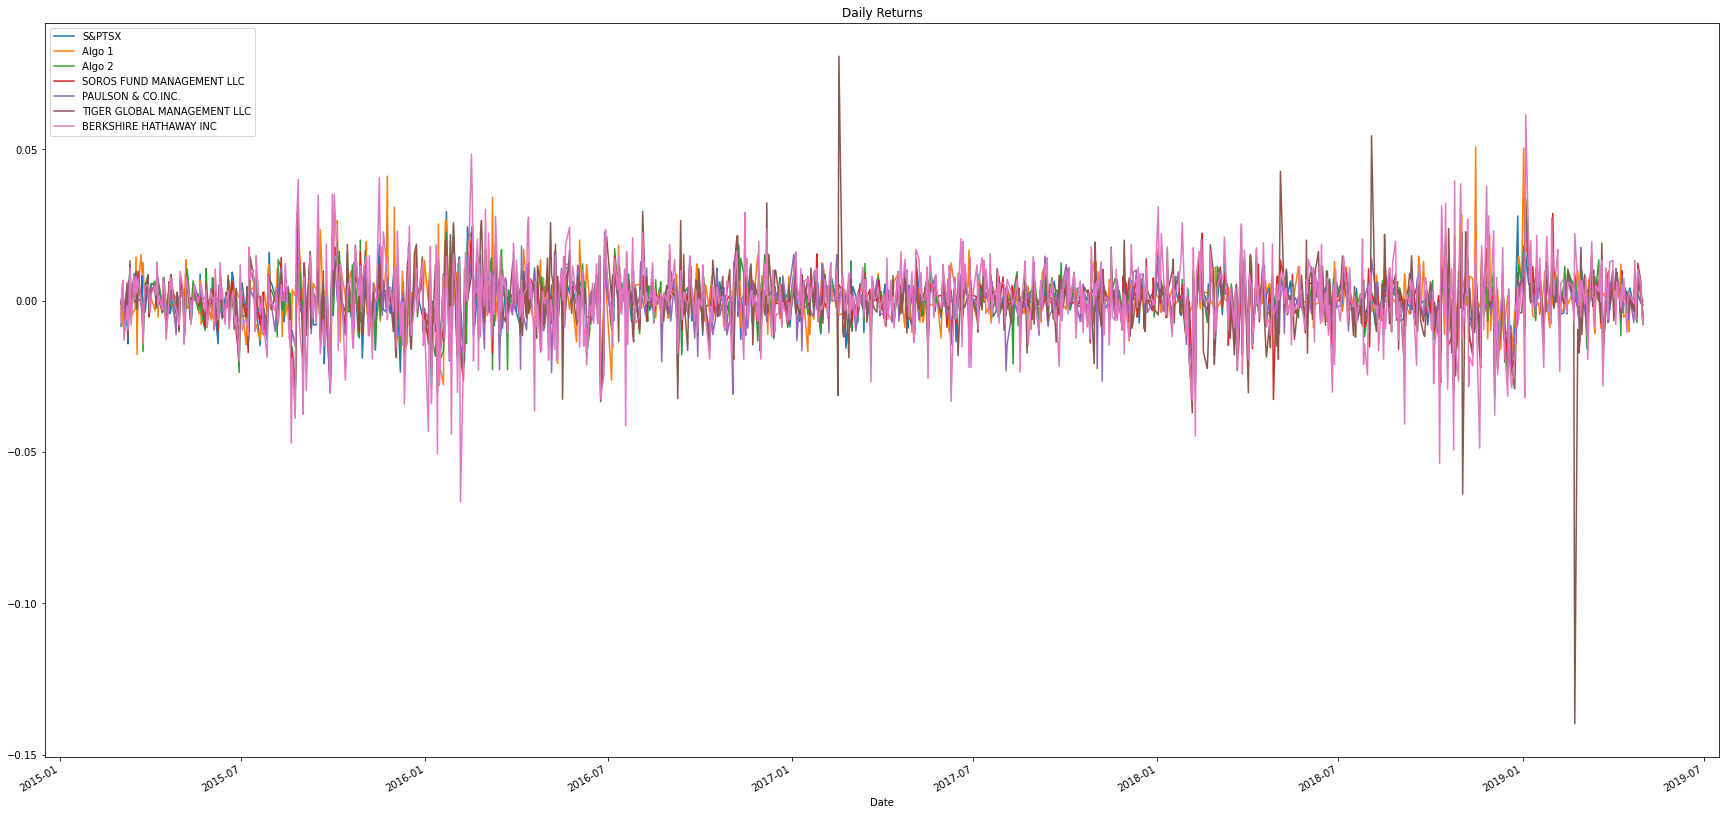

In [16]:
# Plot daily returns of all portfolios
combined_df.plot( title="Daily Returns" , figsize=(30,15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

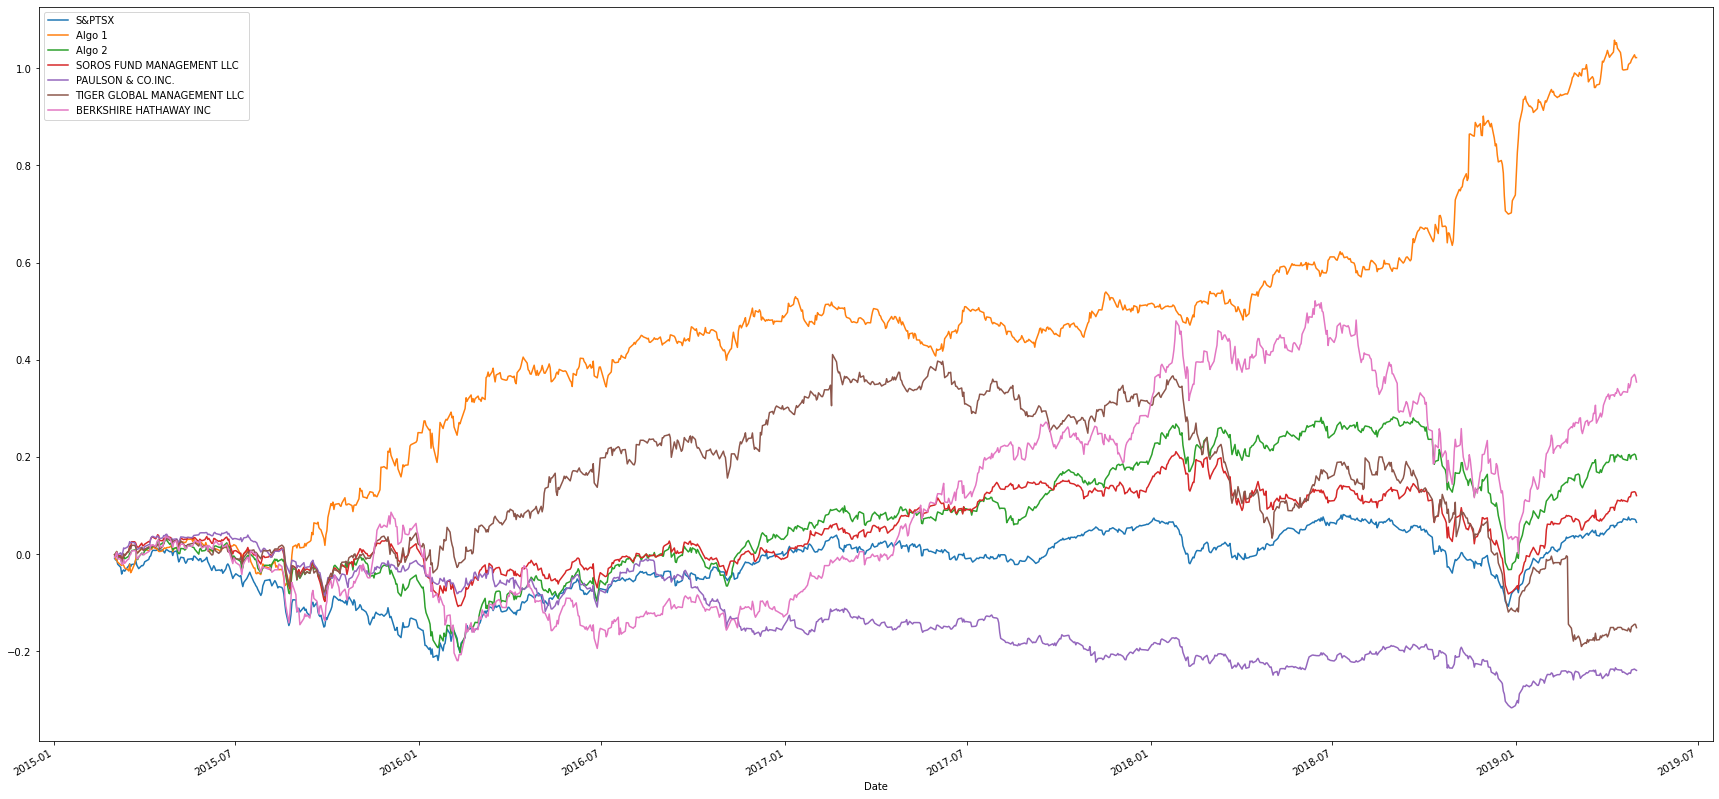

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(30,15))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

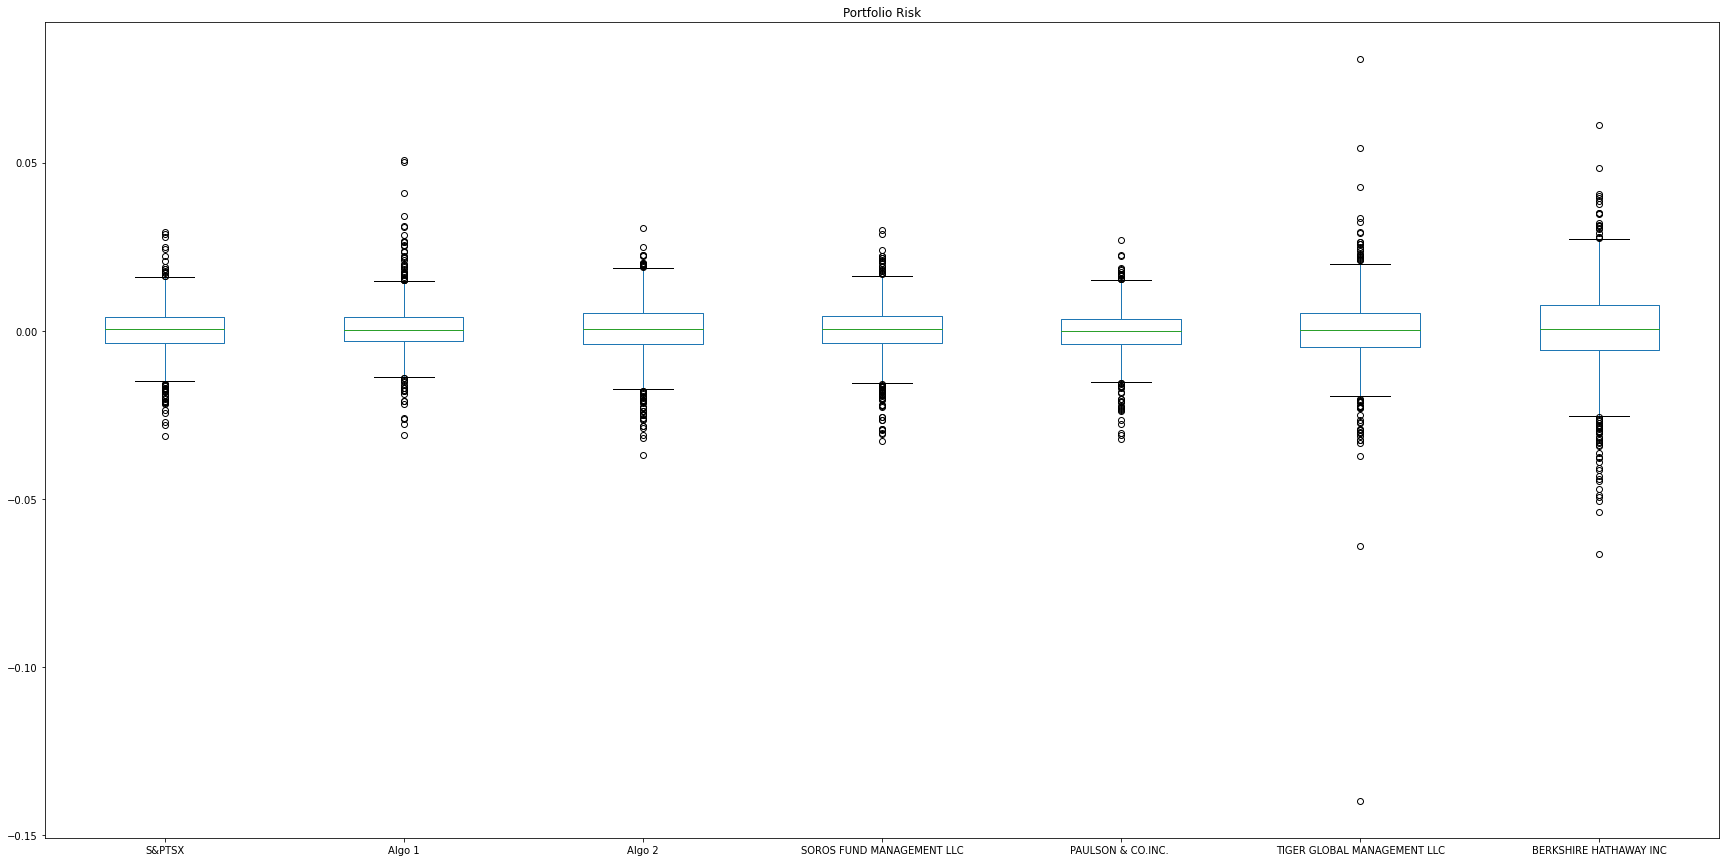

In [18]:
# Box plot to visually show risk
combined_df.plot.box(title= "Portfolio Risk", figsize=(30,15))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std

S&PTSX                         0.007034
Algo 1                         0.007589
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60
portfolios_riskier_than_SPTSX =[daily_std > daily_std['S&PTSX']]
portfolios_riskier_than_SPTSX

[S&PTSX                         False
 Algo 1                          True
 Algo 2                          True
 SOROS FUND MANAGEMENT LLC       True
 PAULSON & CO.INC.              False
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
ann_std = daily_std *np.sqrt(252)
ann_std

S&PTSX                         0.111664
Algo 1                         0.120470
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

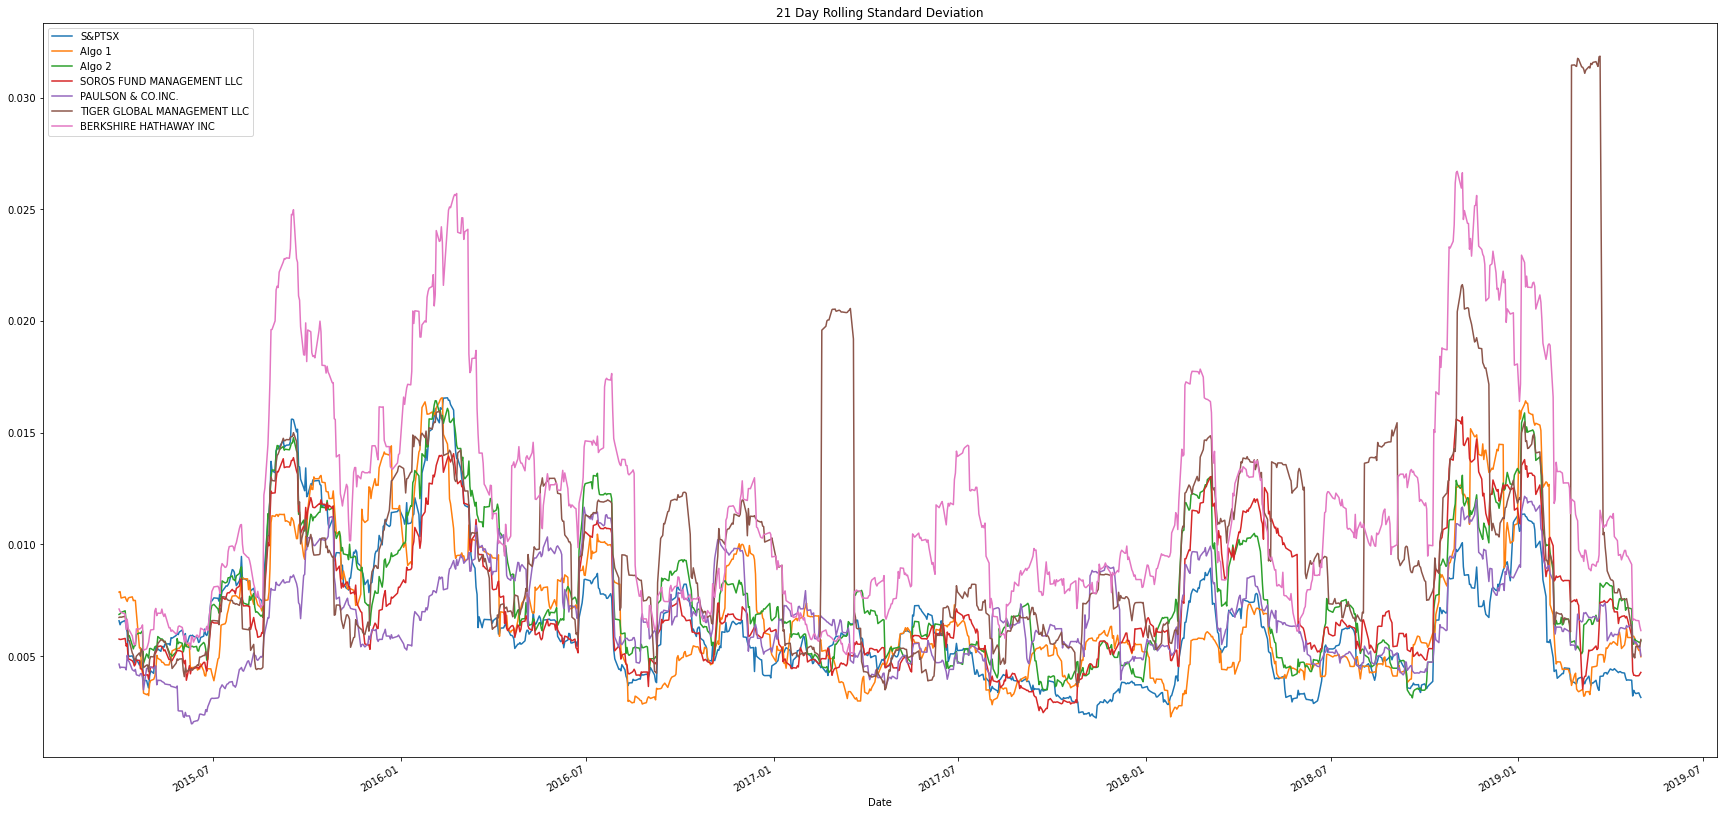

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(30,15))

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

S&PTSX    Algo 1    Algo 2  \
S&PTSX                       1.000000  0.310276  0.737370   
Algo 1                       0.310276  1.000000  0.285455   
Algo 2                       0.737370  0.285455  1.000000   
SOROS FUND MANAGEMENT LLC    0.673930  0.313795  0.826667   
PAULSON & CO.INC.            0.486511  0.266363  0.674015   
TIGER GLOBAL MANAGEMENT LLC  0.440583  0.161236  0.506689   
BERKSHIRE HATHAWAY INC       0.557250  0.289378  0.684609   

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
S&PTSX                                        0.673930            0.486511   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   

                             TIGER GLOBAL MANAGEMENT LLC  \
S&PTSX                                          0.440583   
Algo 1                                          0.161236   
Algo 2                                          0.506689   
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   

                             BERKSHIRE HATHAWAY INC  
S&PTSX                                     0.557250  
Algo 1                                     0.289378  
Algo 2                                     0.684609  
SOROS FUND MANAGEMENT LLC                  0.750181  
PAULSON & CO.INC.                          0.540033  
TIGER GLOBAL MANAGEMENT LLC                0.423524  
BERKSHIRE HATHAWAY INC                     1.000000

<AxesSubplot:>

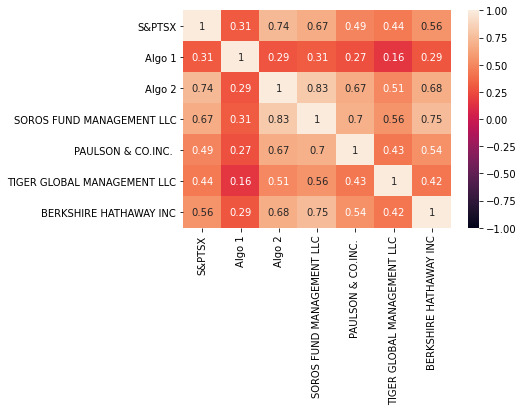

In [24]:
# Display de correlation matrix
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [25]:
# Calculate covariance of a single portfolio
algo_1_covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&PTSX'])
algo_1_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000002
2019-04-26    0.000002
2019-04-29    0.000002
2019-04-30    0.000002
2019-05-01    0.000002
Length: 1029, dtype: float64

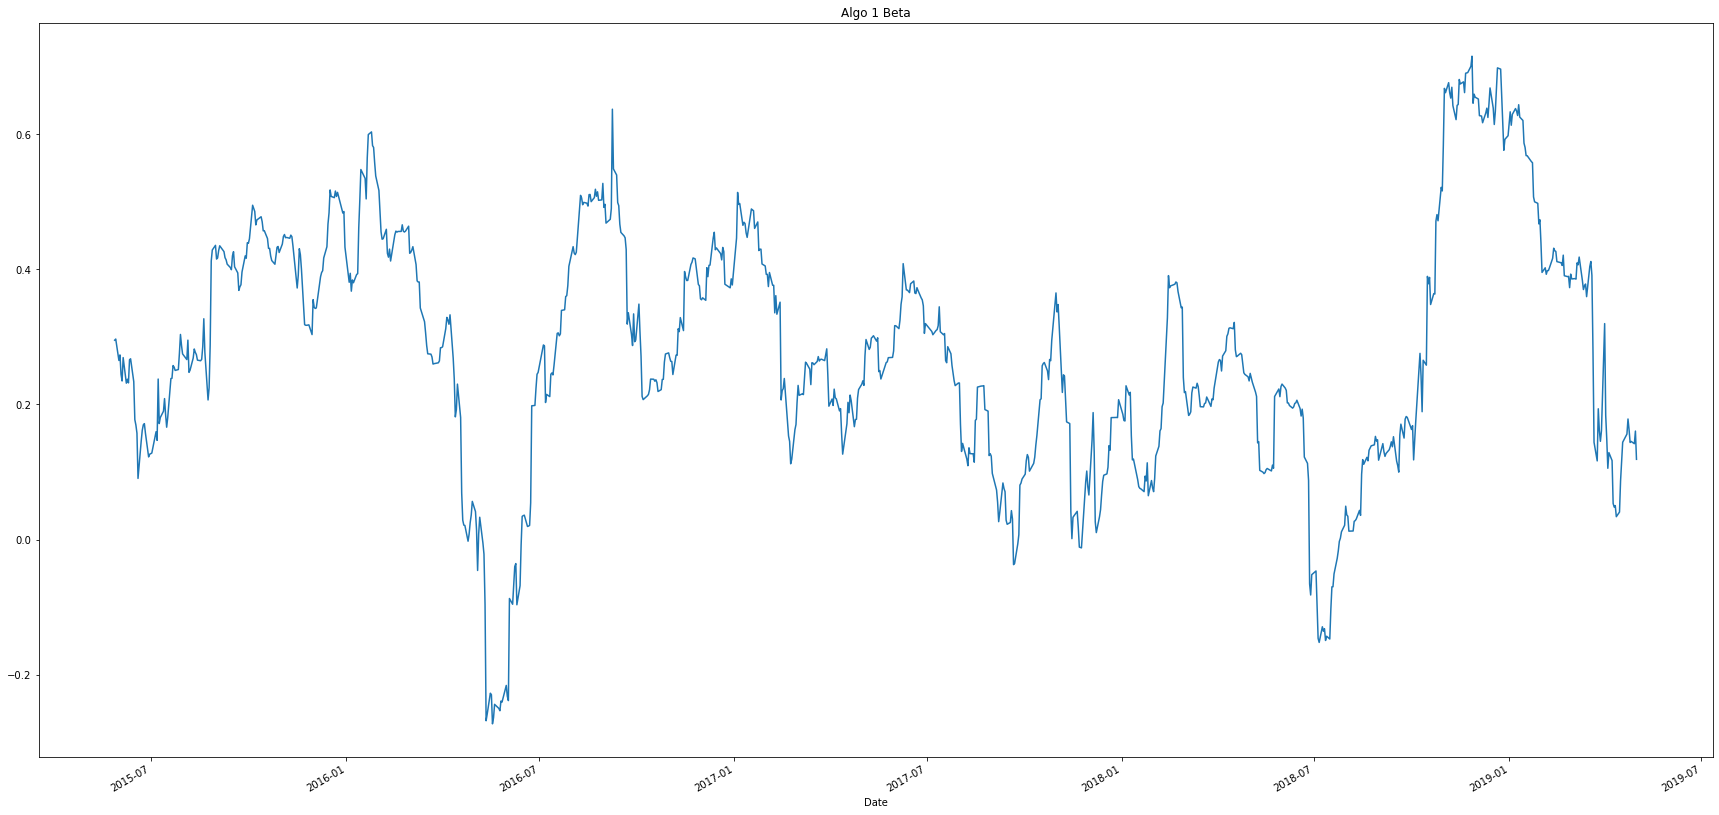

In [26]:
# Calculate variance of S&P TSX
variance = combined_df['S&PTSX'].rolling(window=60).var()
variance
# Computing beta
# Plot beta trend
algo_1_beta = algo_1_covariance / variance
algo_1_beta_plot = algo_1_beta.plot(title="Algo 1 Beta", figsize=(30, 15))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [27]:
# Use `ewm` to calculate the rolling window
ewm = combined_df.ewm(halflife=21, adjust=True).std()
ewm

S&PTSX    Algo 1    Algo 2  SOROS FUND MANAGEMENT LLC  \
Date                                                                  
2015-03-03       NaN       NaN       NaN                        NaN   
2015-03-04  0.003648  0.004700  0.002380                   0.002472   
2015-03-05  0.004936  0.004162  0.002662                   0.002677   
2015-03-06  0.005205  0.003419  0.007166                   0.005349   
2015-03-09  0.004517  0.002999  0.006290                   0.004638   
...              ...       ...       ...                        ...   
2019-04-25  0.004700  0.006526  0.007500                   0.006819   
2019-04-26  0.004628  0.006433  0.007418                   0.006819   
2019-04-29  0.004564  0.006378  0.007304                   0.006708   
2019-04-30  0.004507  0.006310  0.007200                   0.006617   
2019-05-01  0.004546  0.006208  0.007238                   0.006636   

            PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Date                                                          
2015-03-03                 NaN                          NaN   
2015-03-04            0.005814                     0.001441   
2015-03-05            0.004968                     0.002478   
2015-03-06            0.004615                     0.004665   
2015-03-09            0.004471                     0.005496   
...                        ...                          ...   
2019-04-25            0.006342                     0.014811   
2019-04-26            0.006448                     0.014764   
2019-04-29            0.006357                     0.014575   
2019-04-30            0.006270                     0.014336   
2019-05-01            0.006175                     0.014166   

            BERKSHIRE HATHAWAY INC  
Date                                
2015-03-03                     NaN  
2015-03-04                0.007624  
2015-03-05                0.007020  
2015-03-06                0.009387  
2015-03-09                0.008066  
...                            ...  
2019-04-25                0.010830  
2019-04-26                0.010763  
2019-04-29                0.010601  
2019-04-30                0.010481  
2019-05-01                0.010460  

[1029 rows x 7 columns]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

S&PTSX                         0.195550
Algo 1                         1.491514
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

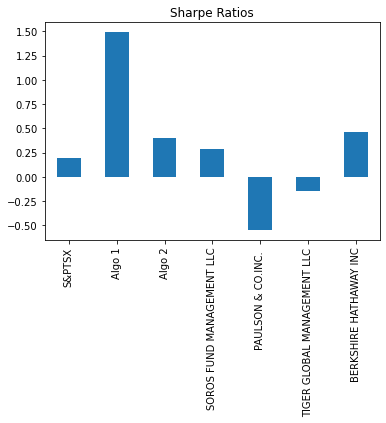

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [30]:
# Algo 1 by far!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock
l_historical_csv = Path("Resources/l_historical.csv")
l_df = pd.read_csv(l_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
l_df = l_df.rename(columns={"Close":"L"})
l_df.head()

Symbol      L
Date                    
2018-01-02      L  57.99
2018-01-03      L  57.41
2018-01-04      L  57.42
2018-01-05      L  57.42
2018-01-08      L  56.86

In [32]:
# Reading data from 2nd stock
otex_csv = Path("Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
otex_df = otex_df.rename(columns={"Close":"Otex"})
otex_df.head()

Symbol   Otex
Date                    
2018-01-02   OTEX  43.58
2018-01-03   OTEX  43.07
2018-01-04   OTEX  42.91
2018-01-05   OTEX  42.57
2018-01-08   OTEX  42.16

In [33]:
# Reading data from 3rd stock
shop_csv = Path("Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
shop_df = shop_df.rename(columns={"Close":"Shop"})
shop_df.head()

Symbol    Shop
Date                     
2018-01-02   SHOP  132.06
2018-01-03   SHOP  135.15
2018-01-04   SHOP  137.46
2018-01-05   SHOP  137.26
2018-01-08   SHOP  139.51

In [34]:
# Combine all stocks in a single DataFrame
combined_set_df = pd.concat([shop_df,otex_df,l_df], axis="columns", join="inner")
combined_set_df.drop(columns=['Symbol'],inplace=True)
combined_set_df.head()

Shop   Otex      L
Date                            
2018-01-02  132.06  43.58  57.99
2018-01-03  135.15  43.07  57.41
2018-01-04  137.46  42.91  57.42
2018-01-05  137.26  42.57  57.42
2018-01-08  139.51  42.16  56.86

In [35]:
# Reset Date index
combined_set_df.sort_index(inplace=True)

In [36]:
# Reorganize portfolio data by having a column per symbol
# i got ahead of myself on this one

In [37]:
# Calculate daily returns
combined_set_df.isnull().sum()
combined_returns_df = combined_set_df.pct_change()

# Drop NAs
combined_returns_df.dropna(inplace=True)

# Display sample data
combined_returns_df.head()

Shop      Otex         L
Date                                    
2018-01-03  0.023398 -0.011703 -0.010002
2018-01-04  0.017092 -0.003715  0.000174
2018-01-05 -0.001455 -0.007924  0.000000
2018-01-08  0.016392 -0.009631 -0.009753
2018-01-09 -0.011254 -0.000712  0.008969

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [50]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data
portfolio_weighted_returns = combined_returns_df.dot(weights)
portfolio_weighted_returns = portfolio_weighted_returns.rename("Custom")
portfolio_weighted_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
Name: Custom, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [51]:
# Join your returns DataFrame to the original returns DataFrame
all_combined_df = pd.concat([whale_returns_df,algo_returns_df, sp_tsx_returns, portfolio_weighted_returns], axis='columns', join='inner')
all_combined_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-01-03                   0.004658            0.000027   
2018-01-04                  -0.000914            0.004196   
2018-01-05                   0.004072            0.000823   
2018-01-08                   0.004473           -0.003739   
2018-01-09                  -0.001028            0.000872   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-03                     0.001979                0.005676 -0.000890   
2018-01-04                     0.010743                0.004065 -0.000914   
2018-01-05                     0.000737                0.022023 -0.003839   
2018-01-08                     0.005085                0.003435  0.001653   
2018-01-09                     0.001789                0.000708 -0.001004   

              Algo 2    S&PTSX    Custom  
Date                                      
2018-01-03  0.008175  0.003774  0.000565  
2018-01-04  0.004294  0.002528  0.004517  
2018-01-05  0.006405 -0.003869 -0.003126  
2018-01-08  0.000658 -0.001944 -0.000997  
2018-01-09 -0.002091  0.000097 -0.000999

In [52]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_combined_df.dropna()
all_combined_returns = all_combined_df.pct_change()
all_combined_returns.dropna(inplace=True)
all_combined_returns.head()
all_combined_returns

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-01-04                  -1.196323          154.039069   
2018-01-05                  -5.452816           -0.803813   
2018-01-08                   0.098492           -5.541119   
2018-01-09                  -1.229737           -1.233308   
2018-01-10                   1.679048           -3.625677   
...                               ...                 ...   
2019-04-25                  -1.124733           -2.279801   
2019-04-26                 -29.607053           -8.097525   
2019-04-29                  -0.846082           -0.703202   
2019-04-30                  -2.032021           -1.813282   
2019-05-01                   3.516783           -0.393524   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-04                     4.428865               -0.283892  0.026822   
2018-01-05                    -0.931420                4.417871  3.200128   
2018-01-08                     5.902135               -0.844028 -1.430658   
2018-01-09                    -0.648171               -0.793793 -1.607274   
2018-01-10                    -4.197189               -7.749429 -4.552119   
...                                 ...                     ...       ...   
2019-04-25                     0.288325               -1.759149 -0.376856   
2019-04-26                    -3.397536                1.152302  3.368191   
2019-04-29                    -0.494071               -0.499394  0.746958   
2019-04-30                    -1.041476               -1.708741 -1.565269   
2019-05-01                    29.612341                1.115916 -1.031836   

               Algo 2     S&PTSX    Custom  
Date                                        
2018-01-04  -0.474711  -0.330176  6.999117  
2018-01-05   0.491513  -2.530318 -1.692070  
2018-01-08  -0.897299  -0.497426 -0.681011  
2018-01-09  -4.178178  -1.050113  0.001405  
2018-01-10  -0.892709 -45.832110 -1.528470  
...               ...        ...       ...  
2019-04-25 -19.155605  -0.873648 -1.413567  
2019-04-26  -1.725170  -4.587667 -0.062949  
2019-04-29  -0.461657  -1.349587  0.018485  
2019-04-30  -1.554776   0.501565  7.155134  
2019-05-01   3.687689   2.975171 -1.002945  

[326 rows x 8 columns]

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [64]:
# Calculate the annualized `std`
all_combined_df_daily_std = all_combined_df.std().sort_values(ascending=False)
all_combined_df_annualized_std = all_combined_df_daily_std *np.sqrt(252)
all_combined_df_annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.227445
Custom                         0.224346
TIGER GLOBAL MANAGEMENT LLC    0.219833
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
S&PTSX                         0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

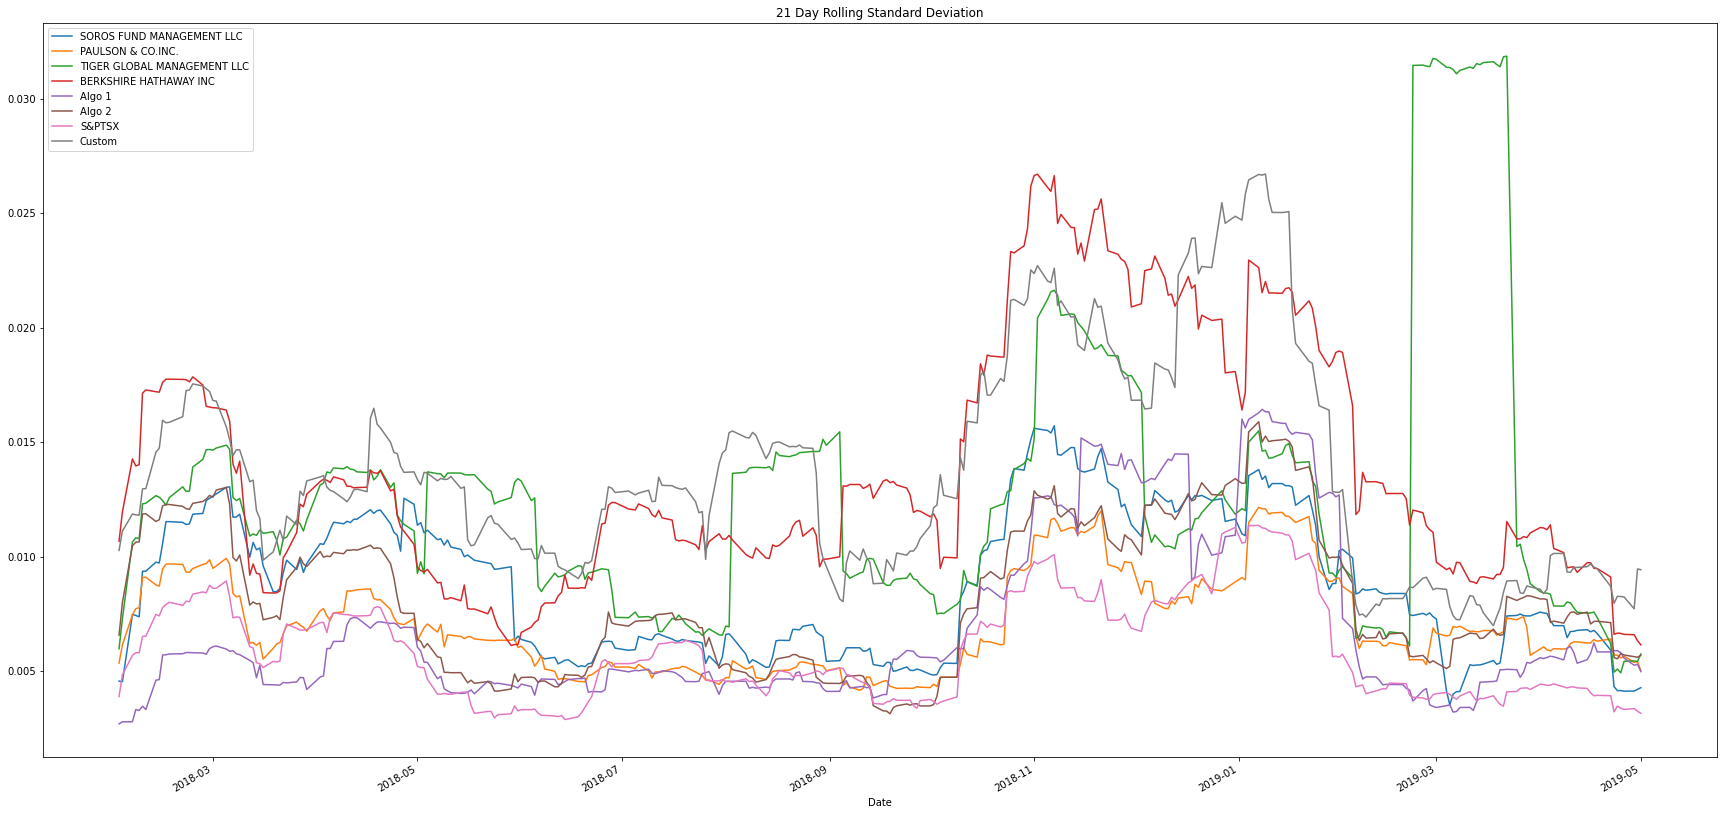

In [63]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
all_combined_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(30,15))

### Calculate and plot the correlation

<AxesSubplot:>

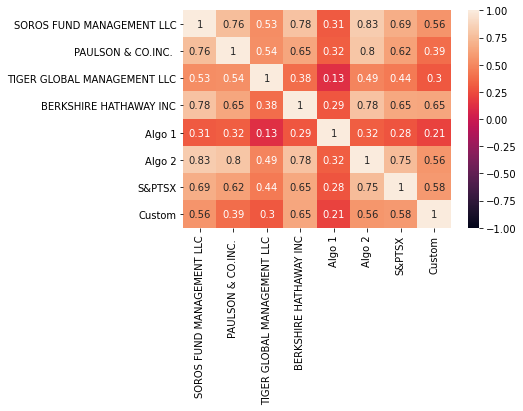

In [67]:
# Calculate and plot the correlation
all_combined_df_correlation = all_combined_df.corr()
sns.heatmap(all_combined_df_correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

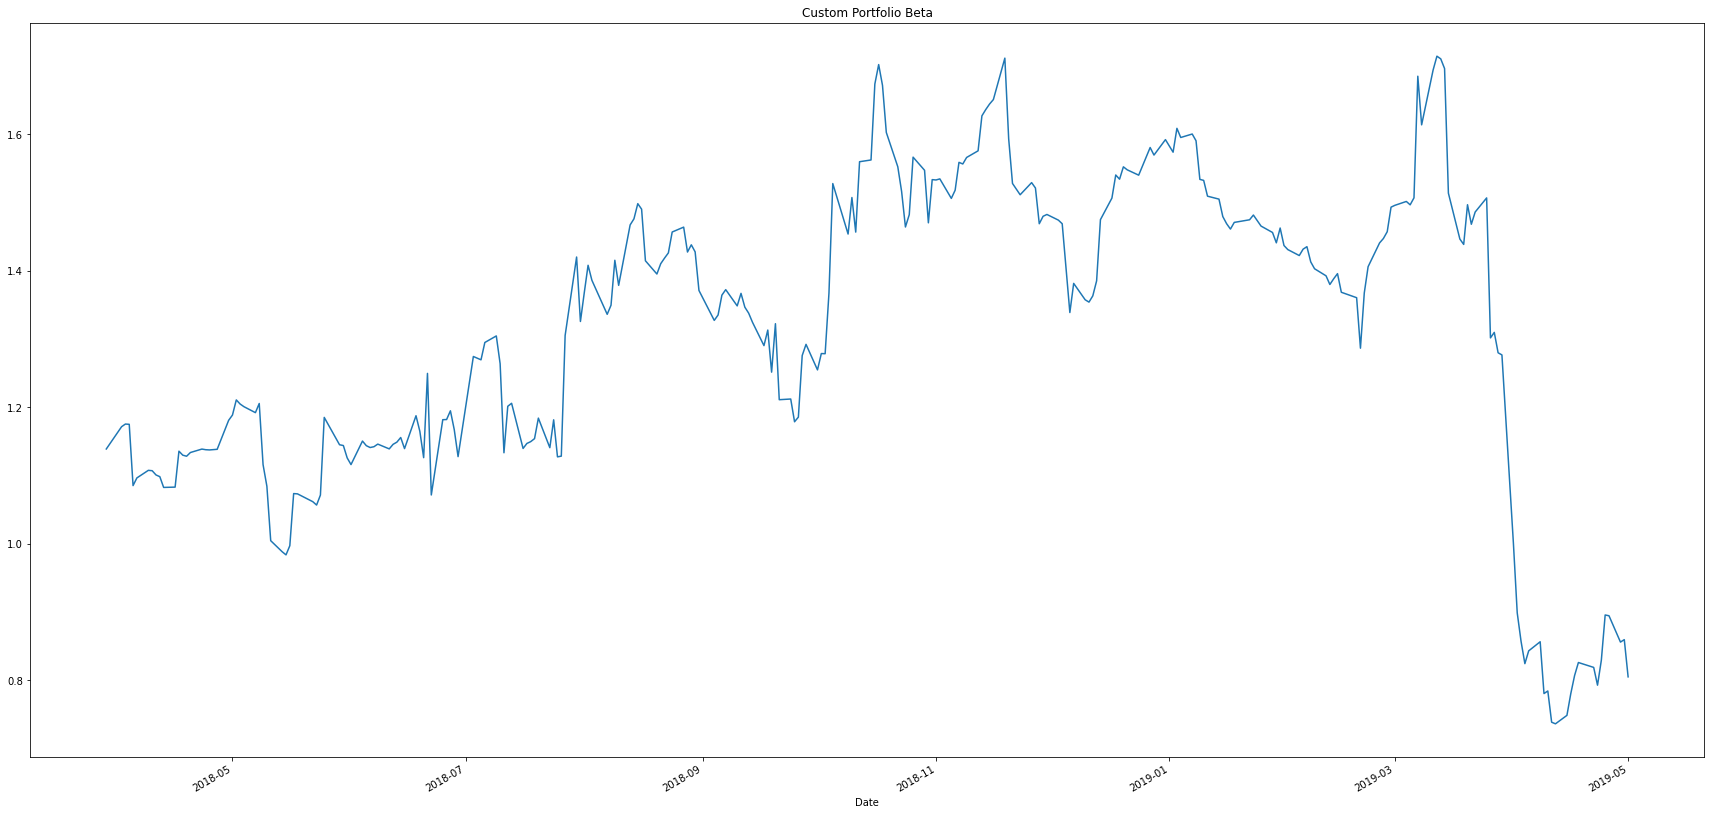

In [69]:
# Calculate and plot Beta
custom_covariance = all_combined_df['Custom'].rolling(window=60).cov(all_combined_df['S&PTSX'])
custom_covariance

variance_2 = all_combined_df['S&PTSX'].rolling(window=60).var()
variance_2

custom_beta = custom_covariance / variance_2
custom_beta_plot = custom_beta.plot(title="Custom Portfolio Beta", figsize=(30, 15))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Calculate Annualized Sharpe Ratios
all_combined_df_sharpe_ratios = (all_combined_df.mean() * 252) / (all_combined_df.std() * np.sqrt(252))
all_combined_df_sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.901461
Custom                         1.564547
BERKSHIRE HATHAWAY INC         0.195907
S&PTSX                         0.034651
Algo 2                         0.021394
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

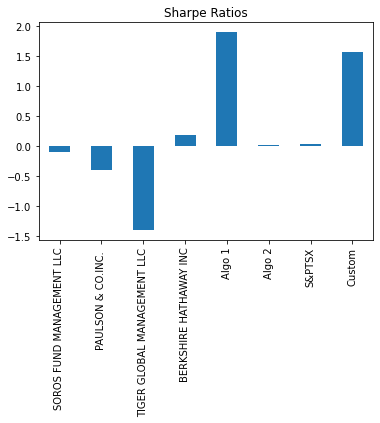

In [71]:
# Visualize the sharpe ratios as a bar plot
all_combined_df_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
# Portfolio came in second to Algo 1 